In [1]:
import numpy as np

In [2]:
from keras.models import load_model
embNet = load_model('./np_datasets/T_Shirt/NEtshirt_embNet_con.h5')

/home/inouelab/.conda/envs/zukapy35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/inouelab/.conda/envs/zukapy35/lib/python3.5/site-packages/keras/engine/saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


### Load images and resize to (128,128,3) with padding 
shopイメージだけのリストを作りたい

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
import random
%matplotlib inline

In [4]:
def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result

In [5]:
BASE_PATH = 'crop_img/img/CLOTHING/T_Shirt/' # select 'T_Shirt' cuz the Model was trained with 'T_Shirt Dataset'
ids = sorted([x for x in os.listdir(BASE_PATH)])

In [6]:
BASE_PATH2 = 'crop_img/img/TOPS/T_Shirt/' # select 'T_Shirt' cuz the Model was trained with 'T_Shirt Dataset'
ids2 = sorted([x for x in os.listdir(BASE_PATH2)])

In [7]:
ids[0]

'id_00004844'

idだけをint型で抽出

In [8]:
int(ids[0][3:])

4844

### make "garally" dataset 
- garally:img pool for retrieval(shop domain)
- consumer:query imgs for query(consumer domain)

In [25]:
garally = []
consumer = []
garally_ids=[]
consumer_ids=[]
for id_ in ids:
    files = sorted([BASE_PATH+id_+'/'+x for x in os.listdir(BASE_PATH+id_)])
    con = sorted([x for x in files if 'comsumer' in x])
    print(con[:10])
    shop = sorted([x for x in files if 'shop' in x ])
    for s in shop:
        img = Image.open(s)
        shop_new = img.resize((128,128)).convert('RGB')
#         shop_new = expand2square(img, 0).resize((128,128)).convert('RGB')
        
#         plt.imshow(shop_new)
#         plt.show()
        garally.append(np.array(shop_new)) #idを紐づけたい
        garally_ids.append(int(id_[3:])) #同じ長さのid列を作成
    for c in con:
        img = Image.open(c)
        con_new = img.resize((128,128)).convert('RGB')
#         con_new = expand2square(img, 0).resize((128,128)).convert('RGB')
        
#         plt.imshow(con_new)
#         plt.show()
        consumer.append(np.array(con_new)) #idを紐づけたい
        consumer_ids.append(int(id_[3:])) #同じ長さのid列を作成

['crop_img/img/CLOTHING/T_Shirt/id_00004844/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00004845/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00004845/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00004845/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00004845/comsumer_04.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00004866/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00004866/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00004866/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00004866/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00004866/comsumer_05.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00004866/comsumer_06.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00004866/comsumer_07.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00004866/comsumer_08.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00004879/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00004879/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00004879/comsumer_03.jpg', 'crop_img/img/CLOTHI

['crop_img/img/CLOTHING/T_Shirt/id_00007931/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00007931/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00007931/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00007931/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00007931/comsumer_05.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00007931/comsumer_06.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00007931/comsumer_07.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00007931/comsumer_08.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00007931/comsumer_09.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00007931/comsumer_10.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00007971/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00007971/comsumer_02.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00008042/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00008042/comsumer_02.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00008044/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00008044/comsumer_02.jpg', 'crop_img/img/CLOTHI

['crop_img/img/CLOTHING/T_Shirt/id_00008681/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00008681/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00008681/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00008681/comsumer_04.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00008690/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00008696/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00008696/comsumer_02.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00008704/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00008704/comsumer_02.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00008712/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00008712/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00008712/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00008712/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00008712/comsumer_05.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00008712/comsumer_06.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00008712/comsumer_07.jpg', 'crop_img/img/CLOTH

['crop_img/img/CLOTHING/T_Shirt/id_00009170/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00009170/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00009170/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00009170/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00009170/comsumer_05.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00009170/comsumer_06.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00009170/comsumer_07.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00009170/comsumer_08.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00009185/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00009218/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00009218/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00009218/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00009218/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00009218/comsumer_05.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00009218/comsumer_06.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00009218/comsumer_07.jpg', 'crop_img/img/CLOTHIN

['crop_img/img/CLOTHING/T_Shirt/id_00010265/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00010265/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00010265/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00010265/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00010265/comsumer_05.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00010265/comsumer_06.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00010265/comsumer_07.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00010265/comsumer_08.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00010265/comsumer_09.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00010274/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00010376/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00010430/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00010430/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00010430/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00010430/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00010430/comsumer_05.jpg', 'crop_img/img/CLOTHI

['crop_img/img/CLOTHING/T_Shirt/id_00011777/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00011777/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00011777/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00011777/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00011777/comsumer_05.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00011777/comsumer_06.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00011777/comsumer_07.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00011777/comsumer_08.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00011777/comsumer_09.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00011777/comsumer_10.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00011801/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00011805/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00011805/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00011805/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00011805/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00011805/comsumer_05.jpg', 'crop_img/img/CLOTHIN

['crop_img/img/CLOTHING/T_Shirt/id_00012502/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00012514/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00012521/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00012534/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00012534/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00012534/comsumer_03.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00012537/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00012546/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00012546/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00012546/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00012546/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00012546/comsumer_05.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00012546/comsumer_06.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00012546/comsumer_07.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00012546/comsumer_08.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00012546/comsumer_09.jpg', 'crop_img/img/CLOT

['crop_img/img/CLOTHING/T_Shirt/id_00013769/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00013769/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00013769/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00013769/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00013769/comsumer_05.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00013771/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00013813/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00013813/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00013813/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00013813/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00013813/comsumer_05.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00013813/comsumer_06.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00013813/comsumer_07.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00013817/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00013833/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00013835/comsumer_01.jpg']
['crop_img/img/CLO

['crop_img/img/CLOTHING/T_Shirt/id_00014703/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00014706/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00014706/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00014706/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00014706/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00014706/comsumer_05.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00014711/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00014737/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00014800/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00014800/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00014800/comsumer_03.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00014919/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00014924/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00014924/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00014924/comsumer_03.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00014943/comsumer_01.jpg']
['crop_img/img/C

['crop_img/img/CLOTHING/T_Shirt/id_00016232/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00016245/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00016278/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00016288/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00016288/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00016288/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00016288/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00016288/comsumer_05.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00016288/comsumer_06.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00016321/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00016323/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00016323/comsumer_02.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00016346/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00016346/comsumer_02.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00016380/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00016380/comsumer_02.jpg']
['crop_img/img/C

['crop_img/img/CLOTHING/T_Shirt/id_00017445/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00017451/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00017451/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00017451/comsumer_03.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00017484/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00017484/comsumer_02.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00017512/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00017572/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00017572/comsumer_02.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00017662/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00017745/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00017841/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00017841/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00017841/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00017841/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00017841/comsumer_05.jpg', 'crop_img/img/CL

['crop_img/img/CLOTHING/T_Shirt/id_00018879/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00018879/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00018879/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00018879/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00018879/comsumer_05.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00018879/comsumer_06.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00018965/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00019051/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00019067/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00019112/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00019134/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00019158/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00019246/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00019251/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00019317/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00019317/comsumer_02.jpg', 'crop_img/img/

['crop_img/img/CLOTHING/T_Shirt/id_00020293/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00020303/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00020303/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00020303/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00020303/comsumer_04.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00020411/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00020444/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00020444/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00020444/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00020444/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00020444/comsumer_05.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00020450/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00020450/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00020450/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00020450/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00020450/comsumer_05.jpg', 'crop_img/img/CLOTH

['crop_img/img/CLOTHING/T_Shirt/id_00021607/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00021607/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00021607/comsumer_03.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00021608/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00021608/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00021608/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00021608/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00021608/comsumer_05.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00021608/comsumer_06.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00021608/comsumer_07.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00021608/comsumer_08.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00021608/comsumer_09.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00021608/comsumer_10.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00021620/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00021676/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00021676/comsumer_02.jpg', 'crop_img/img/CLOTHI

['crop_img/img/CLOTHING/T_Shirt/id_00023047/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00023047/comsumer_02.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00023076/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00023076/comsumer_02.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00023090/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00023121/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00023121/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00023121/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00023121/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00023121/comsumer_05.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00023144/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00023144/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00023144/comsumer_03.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00023152/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00023152/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00023152/comsumer_03.jpg', 'crop_img/img/CLOT

['crop_img/img/CLOTHING/T_Shirt/id_00025384/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00025440/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00025440/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00025440/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00025440/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00025440/comsumer_05.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00025535/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00025535/comsumer_02.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00025576/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00025576/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00025576/comsumer_03.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00025589/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00025589/comsumer_02.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00025616/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00025629/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00025629/comsumer_02.jpg', 'crop_img/img/CLO

['crop_img/img/CLOTHING/T_Shirt/id_00027892/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00027892/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00027892/comsumer_03.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00027901/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00027901/comsumer_02.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00027963/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00027963/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00027963/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00027963/comsumer_04.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00028000/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00028079/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00028116/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00028167/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00028167/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00028167/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00028167/comsumer_04.jpg']
['crop_img/img/CL

['crop_img/img/CLOTHING/T_Shirt/id_00030958/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00030958/comsumer_02.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00030958/comsumer_03.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00030958/comsumer_04.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00030958/comsumer_05.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00030958/comsumer_06.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00030958/comsumer_07.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00031085/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00031091/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00031102/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00031102/comsumer_02.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00031109/comsumer_01.jpg', 'crop_img/img/CLOTHING/T_Shirt/id_00031109/comsumer_02.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00031142/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00031161/comsumer_01.jpg']
['crop_img/img/CLOTHING/T_Shirt/id_00031178/comsumer_01.jpg', 'crop_img/img/CL

In [26]:
for id_ in ids2:
    files = sorted([BASE_PATH2+id_+'/'+x for x in os.listdir(BASE_PATH2+id_)])
    con = sorted([x for x in files if 'comsumer' in x])
    print(con[:10])
    shop = sorted([x for x in files if 'shop' in x ])
    for s in shop:
        img = Image.open(s)
#         shop_new = expand2square(img, 0).resize((128,128)).convert('RGB')
        shop_new = img.resize((128,128)).convert('RGB')
        
#         plt.imshow(shop_new)
#         plt.show()
        garally.append(np.array(shop_new)) #idを紐づけたい
        garally_ids.append(int(id_[3:])) #同じ長さのid列を作成
    for c in con:
        img = Image.open(c)
#         con_new = expand2square(img, 0).resize((128,128)).convert('RGB')
        
        con_new = img.resize((128,128)).convert('RGB')
#         plt.imshow(con_new)
#         plt.show()
        consumer.append(np.array(con_new)) #idを紐づけたい
        consumer_ids.append(int(id_[3:])) #同じ長さのid列を作成 

['crop_img/img/TOPS/T_Shirt/id_00000001/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000001/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000001/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000001/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000001/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000001/comsumer_06.jpg']
['crop_img/img/TOPS/T_Shirt/id_00000019/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000019/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00000051/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000051/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00000058/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00000068/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00000082/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00000084/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000084/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000084/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000084/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shi

['crop_img/img/TOPS/T_Shirt/id_00000383/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00000397/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00000404/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000404/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000404/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000404/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000404/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000404/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000404/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000404/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000404/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000404/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00000405/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000405/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00000419/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000419/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000419/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00000762/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000762/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000762/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000762/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000762/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000762/comsumer_06.jpg']
['crop_img/img/TOPS/T_Shirt/id_00000769/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000769/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00000774/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000774/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00000782/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000782/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000782/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000782/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000782/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000782/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00000782/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00001053/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001053/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00001054/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001054/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001054/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001054/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001054/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001054/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001054/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001054/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001054/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001054/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00001058/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001058/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001058/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001058/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001058/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/i

['crop_img/img/TOPS/T_Shirt/id_00001328/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001328/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001328/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001328/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001328/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001328/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001328/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001328/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001328/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001328/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00001329/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001329/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001329/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00001342/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001342/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001342/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001342/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/i

['crop_img/img/TOPS/T_Shirt/id_00001607/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001607/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00001614/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00001650/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001650/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001650/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00001666/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001666/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001666/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001666/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001666/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001666/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001666/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001666/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001666/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00001666/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00001676/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00002361/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00002362/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00002362/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00002362/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00002362/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00002362/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00002362/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00002362/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00002362/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00002362/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00002362/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00002383/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00002383/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00002411/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00002411/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00002420/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00002420/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00003321/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003321/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00003329/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003329/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003329/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003329/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003329/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003329/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003329/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003329/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003329/comsumer_09.jpg']
['crop_img/img/TOPS/T_Shirt/id_00003354/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003354/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003354/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003354/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003354/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00003375/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00003926/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003926/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003926/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003926/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003926/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003926/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003926/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003926/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003926/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003926/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00003929/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003929/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003929/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003929/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003929/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003929/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00003929/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id

['crop_img/img/TOPS/T_Shirt/id_00004322/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004322/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004322/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004322/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004322/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004322/comsumer_06.jpg']
['crop_img/img/TOPS/T_Shirt/id_00004324/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004324/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004324/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004324/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004324/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004324/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004324/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004324/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004324/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004324/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00004331/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00004607/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004607/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004607/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00004610/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00004611/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004611/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004611/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00004615/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004615/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004615/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004615/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00004637/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004637/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004637/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004637/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004637/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004637/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00004839/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00004849/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00004861/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004861/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004861/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004861/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004861/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004861/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004861/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004861/comsumer_10.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004861/comsumer_11.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004861/comsumer_12.jpg']
['crop_img/img/TOPS/T_Shirt/id_00004876/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004876/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004876/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004876/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00004876/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00005224/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005224/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005224/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005224/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00005236/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005236/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00005262/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005262/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005262/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005262/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005262/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005262/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005262/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005262/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005262/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005262/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00005268/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00005597/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005597/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005597/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005597/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005597/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005597/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005597/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005597/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005597/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005597/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00005600/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00005610/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005610/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005610/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005610/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005610/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00005626/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00005833/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005833/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005833/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00005836/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005836/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005836/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005836/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005836/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005836/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005836/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005836/comsumer_08.jpg']
['crop_img/img/TOPS/T_Shirt/id_00005843/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005843/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005843/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005843/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00005843/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00005844/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00006064/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00006075/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006075/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00006078/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006078/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00006081/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006081/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006081/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006081/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006081/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006081/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006081/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006081/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006081/comsumer_09.jpg']
['crop_img/img/TOPS/T_Shirt/id_00006082/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006082/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00006102/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shi

['crop_img/img/TOPS/T_Shirt/id_00006297/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006297/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006297/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006297/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00006300/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006300/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006300/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006300/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006300/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006300/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006300/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006300/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006300/comsumer_09.jpg']
['crop_img/img/TOPS/T_Shirt/id_00006303/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006303/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00006316/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006316/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00006547/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00006548/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006548/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006548/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00006553/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006553/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006553/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006553/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00006569/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006569/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00006570/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006570/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006570/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006570/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006570/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006570/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006570/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00006799/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006799/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006799/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006799/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006799/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00006801/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006801/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006801/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006801/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006801/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006801/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006801/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006801/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006801/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006801/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00006807/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00006807/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/i

['crop_img/img/TOPS/T_Shirt/id_00007046/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007046/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00007049/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007049/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00007058/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00007059/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00007060/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007060/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00007078/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007078/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007078/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007078/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007078/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007078/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007078/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007078/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007078/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00007348/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007348/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007348/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007348/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007348/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007348/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007348/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007348/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007348/comsumer_09.jpg']
['crop_img/img/TOPS/T_Shirt/id_00007361/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00007365/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007365/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007365/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00007381/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007381/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007381/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007381/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00007540/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007540/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007540/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00007543/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007543/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00007555/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007555/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00007562/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007562/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007562/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007562/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007562/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007562/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007562/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007562/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007562/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007562/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00007847/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00007849/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00007854/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007854/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007854/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007854/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007854/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007854/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007854/comsumer_07.jpg']
['crop_img/img/TOPS/T_Shirt/id_00007858/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007858/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007858/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007858/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007858/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007858/comsumer_06.jpg']
['crop_img/img/TOPS/T_Shirt/id_00007859/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00007859/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00008027/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008027/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008027/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00008031/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008031/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008031/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008031/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008031/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008031/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008031/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008031/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008031/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008031/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00008034/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008034/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008034/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008034/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/i

['crop_img/img/TOPS/T_Shirt/id_00008306/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008306/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008306/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00008312/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008312/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008312/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008312/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008312/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008312/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008312/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008312/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008312/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008312/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00008323/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008323/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008323/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008323/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00008589/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00008595/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008595/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00008613/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00008615/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008615/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008615/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008615/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008615/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00008624/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008624/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00008628/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00008630/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008630/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008630/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008630/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008630/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shi

['crop_img/img/TOPS/T_Shirt/id_00008818/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00008824/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00008827/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00008830/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008830/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00008840/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008840/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008840/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008840/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008840/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008840/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008840/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008840/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008840/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008840/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00008845/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00008845/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shi

['crop_img/img/TOPS/T_Shirt/id_00009077/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009077/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009078/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009078/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009084/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009088/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009093/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009093/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009093/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009093/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009093/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009093/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009093/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009093/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009093/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009093/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009096/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shi

['crop_img/img/TOPS/T_Shirt/id_00009330/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009331/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009331/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009331/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009331/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009331/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009365/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009365/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009365/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009365/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009365/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009365/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009365/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009365/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009365/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009365/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009366/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00009569/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009575/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009575/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009577/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009577/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009578/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009578/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009578/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009578/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009578/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009578/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009578/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009578/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009578/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009578/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009590/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009593/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00009778/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009778/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009778/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009780/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009780/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009780/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009780/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009782/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009782/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009782/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009782/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009782/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009782/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009782/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009782/comsumer_08.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009787/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009787/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00009932/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009932/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009935/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009935/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009935/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009935/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009935/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009935/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009935/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009935/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009935/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009935/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009940/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009942/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009942/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00009942/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00009951/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00010178/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010178/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010178/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010178/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010178/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010178/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010178/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010178/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010178/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010178/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010184/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010196/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010196/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010196/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010196/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010196/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010197/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00010397/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010398/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010400/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010401/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010401/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010402/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010402/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010402/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010402/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010402/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010402/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010402/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010402/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010402/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010402/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010405/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010413/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shi

['crop_img/img/TOPS/T_Shirt/id_00010633/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010633/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010633/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010633/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010633/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010633/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010633/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010633/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010633/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010633/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010636/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010636/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010636/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010637/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010637/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010637/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010645/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00010795/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010795/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010795/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010811/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010811/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010811/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010825/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010825/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010836/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010836/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010845/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010845/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010845/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010845/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00010849/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010849/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00010849/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00011141/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011143/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011145/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011145/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011146/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011146/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011146/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011146/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011155/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011165/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011166/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011171/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011171/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011171/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011171/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011171/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011171/comsumer_06.jpg']
['crop_img/img/TOPS/T_S

['crop_img/img/TOPS/T_Shirt/id_00011493/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011506/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011509/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011509/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011509/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011509/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011509/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011509/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011509/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011509/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011509/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011509/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011514/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011514/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011530/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011530/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011530/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00011775/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011775/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011775/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011776/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011779/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011779/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011779/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011779/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011779/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011779/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011779/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011779/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011779/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011779/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011780/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011780/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011781/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00011979/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011979/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011988/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011988/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011988/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011989/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011989/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011989/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011991/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011992/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011992/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011992/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011992/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011992/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00011992/comsumer_06.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011994/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00011996/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shi

['crop_img/img/TOPS/T_Shirt/id_00012174/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012174/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00012178/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012178/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012178/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012178/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012178/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012178/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012178/comsumer_07.jpg']
['crop_img/img/TOPS/T_Shirt/id_00012185/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012185/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012185/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012185/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012185/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012185/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012185/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012185/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/i

['crop_img/img/TOPS/T_Shirt/id_00012391/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00012409/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012409/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012409/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012409/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012409/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012409/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012409/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012409/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012409/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012409/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00012411/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012411/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012411/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012411/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012411/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012411/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/i

['crop_img/img/TOPS/T_Shirt/id_00012806/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012806/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012806/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012806/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012806/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00012809/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00012810/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012810/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012810/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012810/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012810/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012810/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012810/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012810/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012810/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00012810/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00012813/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00013008/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013009/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013009/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013009/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013010/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013010/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013010/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013010/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013010/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013010/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013010/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013010/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013010/comsumer_09.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013015/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013016/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013016/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013016/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00013156/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013156/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013156/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013156/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013156/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013156/comsumer_06.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013159/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013159/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013162/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013162/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013162/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013171/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013174/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013174/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013174/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013174/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013174/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00013346/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013346/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013346/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013346/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013346/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013346/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013346/comsumer_07.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013347/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013347/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013347/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013347/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013347/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013347/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013347/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013347/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013347/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013347/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/i

['crop_img/img/TOPS/T_Shirt/id_00013504/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013504/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013508/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013508/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013520/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013520/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013524/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013532/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013538/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013538/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013538/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013538/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013538/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013538/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013538/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013538/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013538/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00013805/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013808/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013808/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013809/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013812/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013812/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013812/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013812/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013812/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013812/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013812/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013812/comsumer_08.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013816/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013816/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013836/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013836/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013836/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00013993/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013993/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013995/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013995/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013996/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00013999/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013999/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013999/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013999/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013999/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013999/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013999/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013999/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013999/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00013999/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014001/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014011/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00014123/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014123/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014123/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014123/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014123/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014123/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014123/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014123/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014123/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014123/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014127/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014128/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014128/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014128/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014128/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014128/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014128/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/i

['crop_img/img/TOPS/T_Shirt/id_00014309/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014309/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014309/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014309/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014309/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014309/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014309/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014309/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014309/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014309/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014310/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014310/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014310/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014310/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014320/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014320/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014320/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00014527/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014530/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014530/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014541/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014543/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014550/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014550/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014550/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014550/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014564/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014567/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014567/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014574/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014574/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014574/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014574/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014574/comsumer_05.jpg']
['crop_img/img/TOPS/T_S

['crop_img/img/TOPS/T_Shirt/id_00014726/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014733/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014734/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014734/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014734/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014734/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014734/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014738/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014738/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014738/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014738/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014738/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014738/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014738/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014738/comsumer_08.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014742/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014743/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00014935/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014935/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014935/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014935/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014935/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014935/comsumer_06.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014940/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014942/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014942/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014942/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014942/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014942/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014942/comsumer_06.jpg']
['crop_img/img/TOPS/T_Shirt/id_00014946/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014946/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014946/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00014946/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00015176/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015176/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015176/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015176/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015176/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015176/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015176/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015176/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015176/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015176/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015179/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015179/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015181/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015181/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015184/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015186/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015186/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00015374/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015374/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015374/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015374/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015374/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015375/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015384/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015384/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015396/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015396/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015396/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015396/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015396/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015396/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015396/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015396/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015396/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00015541/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015541/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015541/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015541/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015541/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015541/comsumer_06.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015544/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015559/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015559/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015559/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015559/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015568/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015568/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015568/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015578/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015578/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015578/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00015761/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015766/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015773/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015777/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015777/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015782/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015782/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015782/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015782/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015782/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015782/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015782/comsumer_07.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015790/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015805/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015805/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015805/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015807/comsumer_01.jpg']
['crop_img/img/TOPS/T_S

['crop_img/img/TOPS/T_Shirt/id_00015978/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015978/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015978/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015978/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015988/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015988/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015988/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015988/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015988/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00015991/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015991/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015991/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015991/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015991/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015991/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015991/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00015991/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/i

['crop_img/img/TOPS/T_Shirt/id_00016123/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016129/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016129/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016133/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016133/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016133/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016133/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016133/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016133/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016133/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016133/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016133/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016133/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016134/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016137/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016153/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016153/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00016334/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016334/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016334/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016334/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016334/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016334/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016334/comsumer_07.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016336/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016336/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016337/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016337/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016337/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016337/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016339/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016339/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016339/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016339/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00016515/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016519/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016520/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016520/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016520/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016520/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016522/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016522/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016522/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016522/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016523/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016524/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016524/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016524/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016524/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016529/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016529/comsumer_02.jpg']
['crop_img/img/TOPS/T_Sh

['crop_img/img/TOPS/T_Shirt/id_00016664/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016665/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016665/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016670/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016672/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016672/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016672/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016672/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016685/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016685/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016685/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016685/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016685/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016685/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016685/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016685/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016685/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00016829/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016829/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016829/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016829/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016829/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016829/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016829/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016829/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016829/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016829/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016859/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016859/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016861/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016862/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00016862/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016866/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00016882/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00017098/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017099/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017102/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017102/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017102/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017102/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017102/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017102/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017102/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017102/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017102/comsumer_09.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017104/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017104/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017104/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017104/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017104/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017104/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00017333/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017333/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017351/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017351/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017351/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017351/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017351/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017351/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017351/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017351/comsumer_08.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017357/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017359/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017360/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017360/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017360/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017361/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017361/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00017494/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017494/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017494/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017504/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017506/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017506/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017506/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017506/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017506/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017506/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017506/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017506/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017506/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017506/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017513/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017528/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017528/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00017733/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017733/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017733/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017733/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017733/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017733/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017733/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017733/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017733/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017733/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017740/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017740/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017743/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017747/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017748/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017748/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017753/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shi

['crop_img/img/TOPS/T_Shirt/id_00017899/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017906/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017911/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017911/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017911/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017911/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017911/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017911/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017911/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017911/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017911/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017911/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017919/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017933/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00017933/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017936/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00017942/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shi

['crop_img/img/TOPS/T_Shirt/id_00018089/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018089/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018089/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018089/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018089/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018089/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018089/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018089/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018089/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018089/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00018093/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00018096/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00018097/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00018099/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018099/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018099/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018099/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00018262/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018262/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018262/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00018265/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00018274/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018274/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018274/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018274/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018274/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018274/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018274/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018274/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018274/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018274/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00018280/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00018295/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018295/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00018535/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018535/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018535/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018535/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018535/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018535/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018535/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018535/comsumer_08.jpg']
['crop_img/img/TOPS/T_Shirt/id_00018540/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00018542/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018542/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00018544/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018544/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018544/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018544/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018544/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018544/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00018759/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018759/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00018760/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018760/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018760/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018760/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018760/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018760/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018760/comsumer_07.jpg']
['crop_img/img/TOPS/T_Shirt/id_00018762/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018762/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00018764/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018764/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018764/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00018764/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00018766/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00018769/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00019008/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019008/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019008/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019020/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019020/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019020/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019023/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019023/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019023/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019023/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019023/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019023/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019023/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019023/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019023/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019023/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019033/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00019250/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019253/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019253/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019255/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019255/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019255/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019255/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019267/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019267/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019267/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019268/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019268/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019268/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019269/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019269/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019273/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019273/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shi

['crop_img/img/TOPS/T_Shirt/id_00019384/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019384/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019384/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019384/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019384/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019384/comsumer_06.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019389/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019389/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019389/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019389/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019389/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019390/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019390/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019390/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019390/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019390/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019391/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00019571/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019575/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019576/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019576/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019576/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019576/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019578/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019579/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019588/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019588/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019588/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019588/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019588/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019588/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019588/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019588/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019588/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00019893/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019899/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019899/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019902/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019907/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019907/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019907/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019907/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019907/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019907/comsumer_06.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019909/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019909/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019909/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019909/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019909/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00019909/comsumer_06.jpg']
['crop_img/img/TOPS/T_Shirt/id_00019921/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shi

['crop_img/img/TOPS/T_Shirt/id_00020165/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020165/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020165/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020165/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020165/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020165/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020165/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020165/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020165/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020165/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00020173/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020173/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020173/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020173/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020173/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020173/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020173/comsumer_07.jpg']
['crop_img/img/TOPS/T_Shirt/i

['crop_img/img/TOPS/T_Shirt/id_00020393/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020393/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020393/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00020395/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020395/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00020398/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00020409/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020409/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00020421/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00020424/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00020429/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020429/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020429/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020429/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020429/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00020430/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020430/comsumer_02.jpg']
['crop_img/img/TOPS/T_S

['crop_img/img/TOPS/T_Shirt/id_00020673/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00020681/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020681/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020681/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020681/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020681/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020681/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020681/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020681/comsumer_08.jpg']
['crop_img/img/TOPS/T_Shirt/id_00020687/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020687/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020687/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020687/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00020692/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00020693/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020693/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00020699/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00020859/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020859/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00020875/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020875/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020875/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020875/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020875/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020875/comsumer_06.jpg']
['crop_img/img/TOPS/T_Shirt/id_00020889/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020889/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020889/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020889/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00020893/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020893/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020893/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020893/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00020893/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00021064/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021064/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021064/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021064/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021064/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021064/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021064/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021064/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021064/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021064/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021065/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021076/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021077/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021077/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021083/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021083/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021083/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00021242/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021243/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021243/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021244/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021244/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021244/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021244/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021244/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021253/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021253/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021253/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021253/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021253/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021253/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021253/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021253/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021253/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00021400/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021400/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021400/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021400/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021400/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021401/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021404/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021404/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021404/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021406/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021412/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021412/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021412/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021415/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021415/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021416/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021416/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shi

['crop_img/img/TOPS/T_Shirt/id_00021688/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021688/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021695/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021695/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021695/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021695/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021695/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021695/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021695/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021695/comsumer_08.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021701/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021701/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021711/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021711/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021711/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021713/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021713/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00021993/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021993/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021993/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021993/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021993/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021993/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021993/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021993/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021993/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021993/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00021996/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021996/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021996/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021996/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021996/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021996/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00021996/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id

['crop_img/img/TOPS/T_Shirt/id_00022307/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00022324/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00022326/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022326/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022326/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022326/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022326/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022326/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022326/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022326/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022326/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022326/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00022335/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022335/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022335/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022335/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022335/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00022598/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00022616/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00022623/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00022637/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022637/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022637/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022637/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022637/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022637/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022637/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022637/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022637/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022637/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00022642/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00022643/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022643/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022643/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00022838/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022838/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022838/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022838/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022838/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022838/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022838/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022838/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022838/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022838/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00022840/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00022845/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022845/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022845/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022845/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022845/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00022845/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/i

['crop_img/img/TOPS/T_Shirt/id_00023111/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023111/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00023120/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023120/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023120/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00023123/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023123/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023123/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023123/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023123/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023123/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023123/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023123/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023123/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023123/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00023128/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023128/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00023365/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023365/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023365/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023365/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023365/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023365/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023365/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023365/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023365/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023365/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00023366/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023366/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023366/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023366/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00023387/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023387/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023387/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/i

['crop_img/img/TOPS/T_Shirt/id_00023708/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023708/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023708/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023708/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023708/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023708/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023708/comsumer_07.jpg']
['crop_img/img/TOPS/T_Shirt/id_00023721/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023721/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023721/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00023730/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023730/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023730/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00023736/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023736/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023736/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023736/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00023985/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023985/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023985/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023985/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023985/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023985/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023985/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023985/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023985/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023985/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00023988/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023988/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023988/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00023993/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023993/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023993/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00023993/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/i

['crop_img/img/TOPS/T_Shirt/id_00024305/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024305/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024305/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00024309/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024309/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024309/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024309/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024309/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024309/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024309/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024309/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024309/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024309/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00024333/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00024346/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00024368/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024368/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00024696/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024696/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024696/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024696/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024696/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024696/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024696/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024696/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024696/comsumer_10.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024696/comsumer_11.jpg']
['crop_img/img/TOPS/T_Shirt/id_00024698/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024698/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024698/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024698/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024698/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00024702/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00024702/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00025005/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025015/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025026/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025040/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025056/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025056/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025061/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025061/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025061/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025073/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025073/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025074/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025074/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025074/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025074/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025074/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025074/comsumer_06.jpg', 'crop_img/img/TOPS/T_Sh

['crop_img/img/TOPS/T_Shirt/id_00025308/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025308/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025308/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025308/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025308/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025322/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025322/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025322/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025322/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025322/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025322/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025322/comsumer_07.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025324/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025324/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025324/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025324/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025324/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/i

['crop_img/img/TOPS/T_Shirt/id_00025548/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025548/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025548/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025548/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025548/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025548/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025548/comsumer_07.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025549/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025549/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025549/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025549/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025549/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025553/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025564/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025564/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025564/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025564/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00025926/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025926/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025926/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025926/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025930/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025940/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025940/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025947/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025953/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025955/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025960/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025960/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025960/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025962/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025962/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00025962/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00025963/comsumer_01.jpg']
['crop_img/img/TOPS/T_

['crop_img/img/TOPS/T_Shirt/id_00026248/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026248/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026248/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026248/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026248/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026248/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026248/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026248/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026248/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026248/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00026253/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026253/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026253/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026253/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026253/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00026257/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00026263/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00026653/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00026655/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00026666/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026666/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026666/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026666/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026666/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026666/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026666/comsumer_07.jpg']
['crop_img/img/TOPS/T_Shirt/id_00026680/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00026696/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026696/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026696/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00026715/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00026715/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00026716/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00026724/comsumer_01.jpg']
['crop_img/img/TOPS/T_S

['crop_img/img/TOPS/T_Shirt/id_00027090/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027090/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027090/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00027131/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00027132/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027132/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027132/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00027139/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027139/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027139/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027139/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027139/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00027146/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00027150/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00027151/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027151/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027151/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shi

['crop_img/img/TOPS/T_Shirt/id_00027553/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027553/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027553/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027553/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027553/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027553/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027553/comsumer_07.jpg']
['crop_img/img/TOPS/T_Shirt/id_00027568/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027568/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027568/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027568/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027568/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027568/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027568/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027568/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027568/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027568/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/i

['crop_img/img/TOPS/T_Shirt/id_00027898/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00027906/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00027933/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027933/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00027935/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00027937/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027937/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027937/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027937/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027937/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027937/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027937/comsumer_07.jpg']
['crop_img/img/TOPS/T_Shirt/id_00027940/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00027947/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027947/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00027956/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00027956/comsumer_02.jpg', 'crop_img/img/TOPS/T_Sh

['crop_img/img/TOPS/T_Shirt/id_00028394/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028394/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028394/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028394/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028394/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028394/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028394/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028394/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028394/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028394/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00028397/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028397/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028397/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028397/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028397/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028397/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028397/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id

['crop_img/img/TOPS/T_Shirt/id_00028727/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00028731/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028731/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028731/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028731/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00028736/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00028743/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00028757/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028757/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028757/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028757/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028757/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028757/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028757/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028757/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028757/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00028757/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00029056/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029056/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029059/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029067/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029067/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029067/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029069/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029078/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029085/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029091/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029093/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029093/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029097/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029098/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029102/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029112/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029112/comsumer_02.jpg', 'crop_img/img/TOPS/

['crop_img/img/TOPS/T_Shirt/id_00029560/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029562/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029562/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029562/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029562/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029562/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029562/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029562/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029562/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029562/comsumer_09.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029562/comsumer_10.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029565/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029566/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029566/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029566/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029566/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029566/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/

['crop_img/img/TOPS/T_Shirt/id_00029773/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029778/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029797/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029797/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029797/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029797/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029805/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029806/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029806/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029813/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029822/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029826/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029826/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029828/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029828/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00029832/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00029832/comsumer_02.jpg']
['crop_img/img/TOPS/T

['crop_img/img/TOPS/T_Shirt/id_00030156/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030156/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030156/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030156/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030156/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00030162/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030162/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030162/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030162/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030162/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030162/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030162/comsumer_07.jpg']
['crop_img/img/TOPS/T_Shirt/id_00030183/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00030185/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030185/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030185/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030185/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00030536/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030536/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00030540/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030540/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030540/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00030541/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030541/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030541/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030541/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030541/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030541/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030541/comsumer_07.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030541/comsumer_08.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030541/comsumer_09.jpg']
['crop_img/img/TOPS/T_Shirt/id_00030550/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030550/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00030551/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt

['crop_img/img/TOPS/T_Shirt/id_00030954/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00030956/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00030962/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00030964/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030964/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00030981/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030981/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00030986/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030986/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030986/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00030986/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00030991/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031002/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031016/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031017/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031017/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031019/comsumer_01.jpg']
['crop_img/img/TOPS/

['crop_img/img/TOPS/T_Shirt/id_00031334/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031336/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031336/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031340/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031340/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031350/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031350/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031350/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031350/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031350/comsumer_05.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031382/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031382/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031382/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031384/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031391/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031394/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031394/comsumer_02.jpg', 'crop_img/img/TOPS/T_Sh

['crop_img/img/TOPS/T_Shirt/id_00031913/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031917/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031922/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031941/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031941/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031946/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031946/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031949/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031949/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031949/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031949/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031949/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031949/comsumer_06.jpg', 'crop_img/img/TOPS/T_Shirt/id_00031949/comsumer_07.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031952/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031957/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00031961/comsumer_01.jpg', 'crop_img/img/TOPS/T_S

['crop_img/img/TOPS/T_Shirt/id_00032352/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00032358/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00032358/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00032358/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00032358/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00032358/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00032358/comsumer_10.jpg', 'crop_img/img/TOPS/T_Shirt/id_00032358/comsumer_11.jpg', 'crop_img/img/TOPS/T_Shirt/id_00032358/comsumer_12.jpg', 'crop_img/img/TOPS/T_Shirt/id_00032358/comsumer_13.jpg', 'crop_img/img/TOPS/T_Shirt/id_00032358/comsumer_14.jpg']
['crop_img/img/TOPS/T_Shirt/id_00032360/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00032370/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00032370/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00032371/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00032371/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00032371/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shir

['crop_img/img/TOPS/T_Shirt/id_00032977/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00032977/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00032980/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00032983/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00032984/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00032984/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00032984/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00032984/comsumer_04.jpg']
['crop_img/img/TOPS/T_Shirt/id_00033009/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00033009/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00033009/comsumer_03.jpg']
['crop_img/img/TOPS/T_Shirt/id_00033013/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00033023/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00033026/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00033026/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00033041/comsumer_01.jpg']
['crop_img/img/TOPS/T_Shirt/id_00033048/comsumer_01.jpg']
['crop_img/img/TOPS/T

[]
['crop_img/img/TOPS/T_Shirt/id_00033690/comsumer_01.jpg']
[]
['crop_img/img/TOPS/T_Shirt/id_00033693/comsumer_01.jpg']
[]
[]
[]
[]
['crop_img/img/TOPS/T_Shirt/id_00033713/comsumer_01.jpg']
[]
['crop_img/img/TOPS/T_Shirt/id_00033724/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00033724/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00033724/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00033724/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00033724/comsumer_05.jpg']
[]
['crop_img/img/TOPS/T_Shirt/id_00033736/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00033736/comsumer_02.jpg', 'crop_img/img/TOPS/T_Shirt/id_00033736/comsumer_03.jpg', 'crop_img/img/TOPS/T_Shirt/id_00033736/comsumer_04.jpg', 'crop_img/img/TOPS/T_Shirt/id_00033736/comsumer_05.jpg', 'crop_img/img/TOPS/T_Shirt/id_00033736/comsumer_06.jpg']
[]
[]
['crop_img/img/TOPS/T_Shirt/id_00033770/comsumer_01.jpg', 'crop_img/img/TOPS/T_Shirt/id_00033770/comsumer_02.jpg']
['crop_img/img/TOPS/T_Shirt/id_00033772/comsumer_01.

In [27]:
garally = np.array(garally)
garally_ids = np.array(garally_ids)
consumer = np.array(consumer)
consumer_ids = np.array(consumer_ids)

In [28]:
consumer_ids[:10]

array([4844, 4845, 4845, 4845, 4845, 4866, 4866, 4866, 4866, 4866])

### embedding "garally" dataset
- loadしたembNetによりgarallyデータセットを20次元のベクトルに埋め込む

In [29]:
vec_length=20
emb_vecs = np.zeros((len(garally),vec_length))
for i,x in enumerate(garally):
#     print(x.shape)
    emb_vecs[i] = embNet.predict(np.expand_dims(x,axis=0))[0] # need [0] because of expanding dimension -> [[]]

In [30]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

## make queries
- queries: samples from consumer imgs

In [31]:
# genereate random number
# import random
# queries = random.sample(list(consumer),20)

In [32]:
len(consumer)

31498

In [33]:
sample_num=300

In [34]:
# generate indexes consumerの長さの中からqueryのインデックスを300個抽出
queries_idxs = np.random.randint(0,len(consumer),sample_num)
# queries_idxs
queries = consumer[queries_idxs]
len(queries)
answer_ids = consumer_ids[queries_idxs]

## calc N-top

In [35]:
N = 20

In [36]:
topN_id_list=[]
for query in queries:
    test = embNet.predict(np.expand_dims((query / 255.).astype(np.float32),axis=0))[0]

    # calc order
    similarities = np.zeros(len(emb_vecs))
    for i,emb_vec in enumerate(emb_vecs):
        similarities[i] = distance(test,emb_vec) # retrieve from all the images
    idxs = similarities.argsort() # ascending order/ argsort() returns indexes
    topN_id_list.append(garally_ids[idxs[:N]]) # append ids

In [37]:
topN_id_list[0]

array([ 9239, 13047, 29172, 24860, 28714,  8300,  6325,   984, 22475,
       15354, 20112,  4535, 19389,  5567, 33066, 13503, 23618, 18562,
       26544, 19193])

In [38]:
cnt = 0
top1_idxs = []
for i,(ans_id,topN_id) in enumerate(zip(answer_ids,topN_id_list)):
    if ans_id in topN_id:
        cnt+=1
    if ans_id in topN_id[:20]:
        top1_idxs.append(i)
#         print(ans_id)
print("{0}-top:{1}".format(N,cnt/sample_num))
print(top1_idxs)

20-top:0.0
[]


## Show retrival results

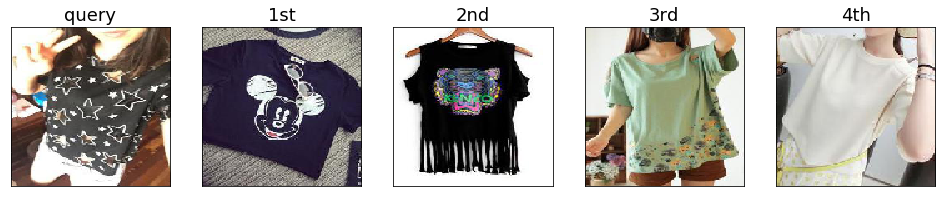

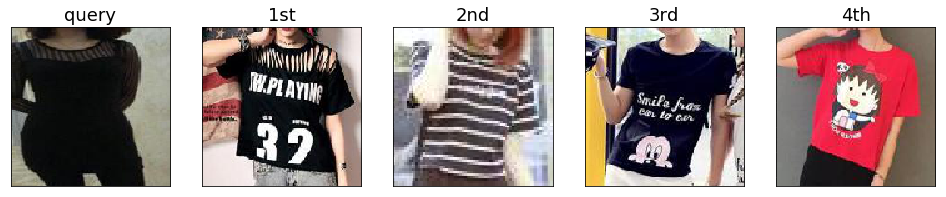

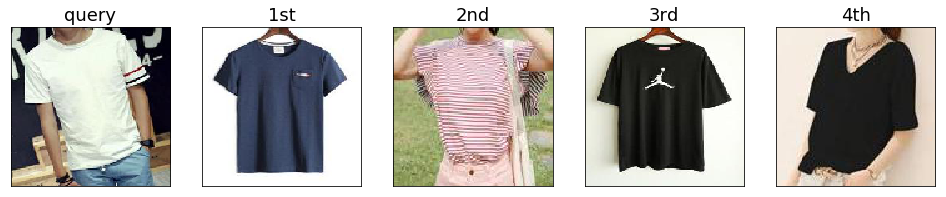

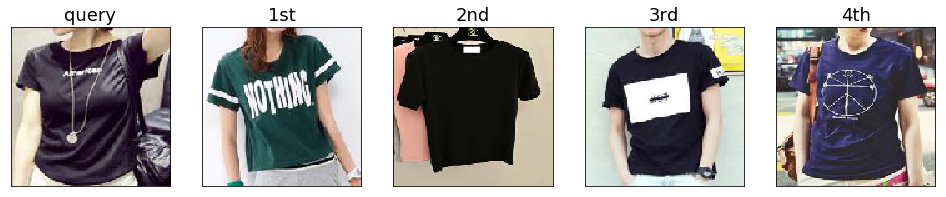

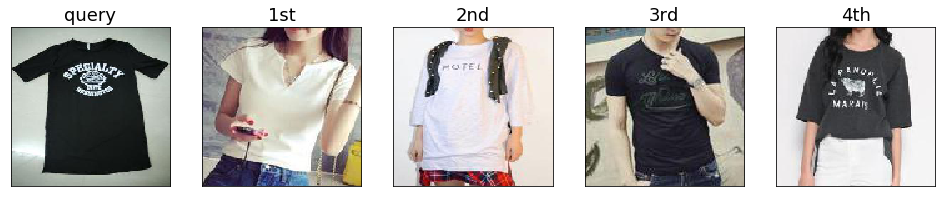

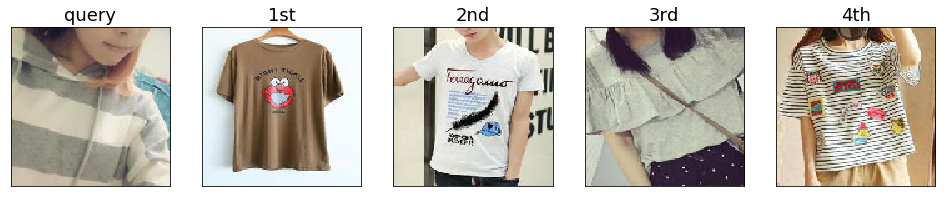

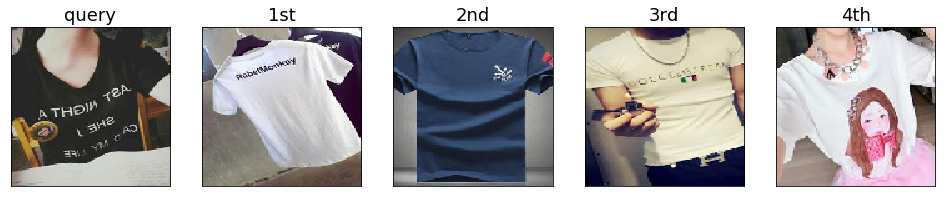

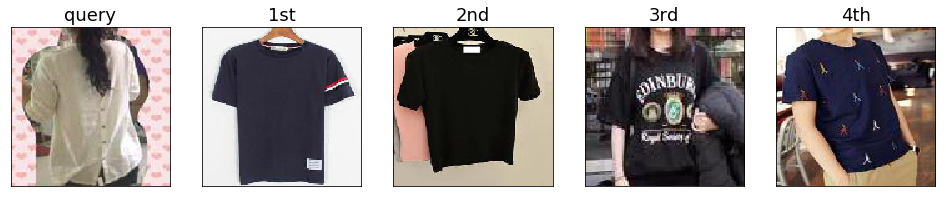

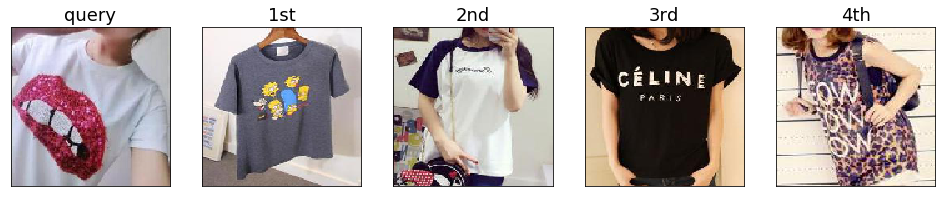

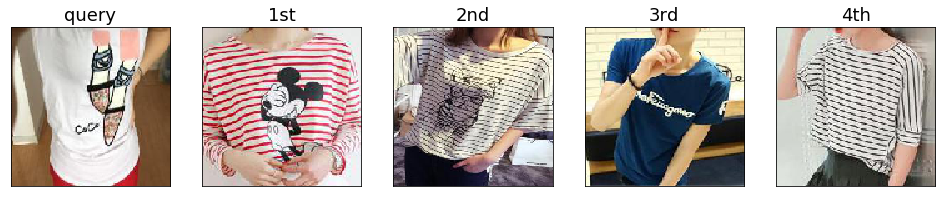

In [50]:
imheight,imwidth=128,128
num = 5
for query in queries[10:20]:
    # show query
    plt.figure(figsize=(20,10))
    plt.subplot(1,6,1)
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    plt.tick_params(color='white')
    test = embNet.predict(np.expand_dims((query / 255.).astype(np.float32),axis=0))[0]
    plt.title('query',fontsize=18)
    plt.imshow(query)

    # calc order
    similarities = np.zeros(len(emb_vecs))
    for i,emb_vec in enumerate(emb_vecs):
        similarities[i] = distance(test,emb_vec)
    idxs = similarities.argsort() #ascending order b.c. smaller is better/ get the index array in ascending order
    
    # show nearest
    plt.subplot(1,6,2)
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    plt.tick_params(color='white')
    nearest = garally[idxs[0]]
    plt.title('1st',fontsize=18)
    plt.imshow(nearest)
    
    # show 2nd
    plt.subplot(1,6,3)
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    plt.tick_params(color='white')
    second = garally[idxs[1]]
    plt.title('2nd',fontsize=18)
    plt.imshow(second)
    
    # show 3rd
    plt.subplot(1,6,4)
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    plt.tick_params(color='white')
    third = garally[idxs[2]]
    plt.title('3rd',fontsize=18)
    plt.imshow(third)
    
    # show 4th
    plt.subplot(1,6,5)
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    plt.tick_params(color='white')
    fourth = garally[idxs[3]]
    plt.title('4th',fontsize=18)
    plt.imshow(fourth)

## memo
- 色の特徴が抜けていない
    - 大域的な特徴を抽出するネットワークを入れる
- 画像を標準化していない

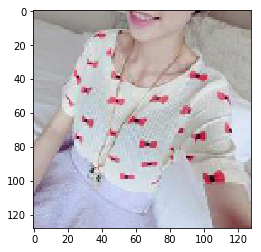

In [48]:
plt.imshow(queries[5])